In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("startup_funding.csv")

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


## Cleaning the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


In [6]:
df.drop(columns='Remarks',inplace=True)

In [7]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [10]:
df.set_index('Sr No',inplace=True)

In [11]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [17]:
df.rename(columns={
    "Date dd/mm/yyyy":"date",
    "Startup Name":"startup",
    "Industry Vertical":"vertical",
    "SubVertical":'subvertical',
    "City  Location":"city",
    "Investors Name":"investor",
    "InvestmentnType":"round",
    "Amount in USD":"amount"
},inplace=True)

In [18]:
df.head()

,date,startup,vertical,subvertical,city,investor,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [19]:
df["amount"]=df["amount"].fillna('0')

In [23]:
df['amount']=df['amount'].str.replace(",","")
df['amount']=df['amount'].str.replace("Undisclosed","")
df['amount']=df['amount'].str.replace("unknown","")
df['amount']=df['amount'].str.replace("undisclosed","")

In [24]:
df['amount'].astype("float")

ValueError: could not convert string to float: ''

In [25]:
df=df[df['amount'].str.isdigit()]

In [26]:
df['amount']=df['amount'].astype('float')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3022 non-null   object 
 1   startup      3022 non-null   object 
 2   vertical     2851 non-null   object 
 3   subvertical  2097 non-null   object 
 4   city         2842 non-null   object 
 5   investor     2998 non-null   object 
 6   round        3020 non-null   object 
 7   amount       3022 non-null   float64
dtypes: float64(1), object(7)
memory usage: 212.5+ KB


In [28]:
def to_inr(dolar):
    inr=dolar*82.5
    return inr/10000000

In [30]:
df['amount']=df['amount'].apply(to_inr)

In [31]:
df['amount']

Sr No
1       1650.000000
2         66.399250
3        151.460595
4         24.750000
5         14.850000
           ...     
3040      37.125000
3041       6.806250
3042      12.375000
3043       0.000000
3044       1.155000
Name: amount, Length: 3022, dtype: float64

In [32]:
pd.to_datetime(df['date'])

c:\users\arunav\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\arunav\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\arunav\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\arunav\appdata\local\programs\python\python39\lib\site-packag

ParserError: year 72018 is out of range: 05/072018

In [34]:
df['date']=df['date'].str.replace('05/072018','05/07/2018')

In [38]:
df.shape

(3022, 8)

In [40]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

c:\users\arunav\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\arunav\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\arunav\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\arunav\appdata\local\programs\python\python39\lib\site-packag

In [41]:
df.shape

(3022, 8)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3020 non-null   datetime64[ns]
 1   startup      3022 non-null   object        
 2   vertical     2851 non-null   object        
 3   subvertical  2097 non-null   object        
 4   city         2842 non-null   object        
 5   investor     2998 non-null   object        
 6   round        3020 non-null   object        
 7   amount       3022 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 212.5+ KB


In [44]:
df=df.dropna(subset=['date','startup','vertical','city','investor','round','amount'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2815 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2815 non-null   datetime64[ns]
 1   startup      2815 non-null   object        
 2   vertical     2815 non-null   object        
 3   subvertical  2071 non-null   object        
 4   city         2815 non-null   object        
 5   investor     2815 non-null   object        
 6   round        2815 non-null   object        
 7   amount       2815 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 197.9+ KB


## Now export the clean data

In [48]:
df.head()

,date,startup,vertical,subvertical,city,investor,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [ ]:
# To get all the investors.....................

In [54]:
sorted(set(df['investor'].str.split(",").sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [55]:
# Recent 5 investments of a investor

In [63]:
df[df['investor'].str.contains('Mumbai Angels Network')].head()[['date','startup','vertical','city','round','amount']].sort_values('date',ascending=False)

,date,startup,vertical,city,round,amount
Sr No,,,,,,
234,2018-11-06,Theranosis,Healthcare,Hyderabad,Seed/ Angel Funding,0.0000
394,2018-05-01,WOTU,E-commerce,Bengaluru,Angel / Seed Funding,0.0000
457,2017-12-14,WeDoSky,Technology,Delhi,Private Equity,0.0000
1080,2017-01-18,Vahdam Teas,eCommerce,New Delhi,Seed Funding,5.3625


In [64]:
df.head()

,date,startup,vertical,subvertical,city,investor,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [65]:
# biggest Investment

In [67]:
df[df['investor'].str.contains('Mumbai Angels Network')].groupby('startup')['amount'].sum().sort_values(ascending=False)

startup
Vahdam Teas    5.3625
Theranosis     0.0000
WOTU           0.0000
WeDoSky        0.0000
Name: amount, dtype: float64

In [68]:
#SEctors invested in

<AxesSubplot:ylabel='amount'>

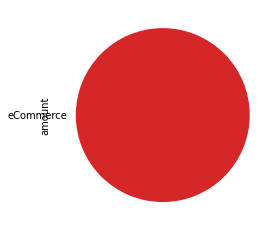

In [72]:
df[df['investor'].str.contains('Mumbai Angels Network')].groupby('vertical')['amount'].sum().plot(kind='pie')

In [73]:
#Stage invested in

<AxesSubplot:ylabel='amount'>

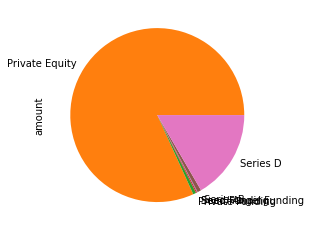

In [77]:
df[df['investor'].str.contains('Sequoia Capital')].groupby('round')['amount'].sum().plot(kind='pie')

In [78]:
df

,date,startup,vertical,subvertical,city,investor,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000
...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000


In [79]:
#city invested in

<AxesSubplot:ylabel='amount'>

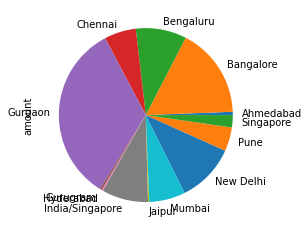

In [80]:
df[df['investor'].str.contains('Sequoia Capital')].groupby('city')['amount'].sum().plot(kind='pie')

In [81]:
df['year']=df['date'].dt.year

In [82]:
df

,date,startup,vertical,subvertical,city,investor,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020
...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015


<AxesSubplot:ylabel='amount'>

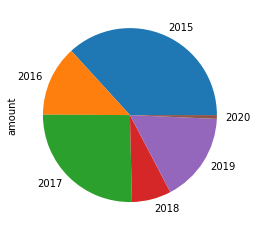

In [83]:
df[df['investor'].str.contains('Sequoia Capital')].groupby('year')['amount'].sum().plot(kind='pie')

## Updating the data by export

In [84]:
df.to_csv("cleaned_startup_data.csv",index=False)

## Startup Analysis

In [88]:
df[df['startup']=='BYJU’S']['vertical'].iloc[0]

'E-Tech'

In [89]:
#getting Subvertical

In [94]:
df[df['startup']=='BYJU’S']['subvertical']

Sr No
1    E-learning
Name: subvertical, dtype: object

In [95]:
#getting round

In [98]:
df[df['startup']=='BYJU’S'][['round','investor','date']]

,round,investor,date
Sr No,,,
1,Private Equity Round,Tiger Global Management,2020-09-01


In [ ]:
#-getting

## Overall analysis

In [100]:
#total amount invested

In [101]:
df

,date,startup,vertical,subvertical,city,investor,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020
...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015


In [103]:
round(df['amount'].sum())

296492

In [104]:
#max amount invested

In [105]:
round(df['amount'].max())

32175

In [118]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).index[0]

'Rapido Bike Taxi'

In [119]:
#avg investment

In [122]:
round(df.groupby('startup')['amount'].sum().mean())

129

In [123]:
# Total funded startups

In [124]:
df['startup'].nunique()

2294

## MoM chart -> Total + Count

In [125]:
df

,date,startup,vertical,subvertical,city,investor,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020
...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015


In [126]:
df['month']=df['date'].dt.month

In [128]:
df.to_csv("cleaned_startup_data.csv",index=False)

In [127]:
df.head()

,date,startup,vertical,subvertical,city,investor,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2


In [130]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


In [131]:
df.groupby(['year','month'])['amount'].sum().reset_index()

,year,month,amount
0,2015,1,5274.637500
1,2015,2,1567.178250
2,2015,3,1910.658750
3,2015,4,4511.058750
4,2015,5,1401.427500
...,...,...,...
58,2019,12,3667.125000
59,2020,1,140.649250
60,2020,2,39.600000
61,2020,9,1801.460595


In [132]:
df['month'].astype('str')+'-'+df['year'].astype('str')

Sr No
1       9-2020
2       1-2020
3       9-2020
4       2-2020
5       2-2020
         ...  
2869    4-2015
2870    4-2015
2871    4-2015
2872    4-2015
2873    4-2015
Length: 2815, dtype: object

In [133]:
df

,date,startup,vertical,subvertical,city,investor,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2
...,...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015,4
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015,4
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015,4


## Sector Analysis

In [ ]:
#count of the sectors

In [150]:
df.groupby('vertical').size().sort_values(ascending=False).head(10)

vertical
Consumer Internet    928
Technology           476
eCommerce            186
Healthcare            69
ECommerce             61
Finance               58
Logistics             32
E-Commerce            27
Education             23
Food & Beverage       22
dtype: int64

In [151]:
#amount each sector contains

In [153]:
round(df.groupby('vertical')['amount'].sum().sort_values(ascending=False).head(10))

vertical
Consumer Internet                   51553.0
eCommerce                           41271.0
Transportation                      32312.0
Technology                          18393.0
ECommerce                           15500.0
Finance                             11256.0
FinTech                             10071.0
E-Commerce                           8254.0
Online Marketplace                   5776.0
E-Commerce & M-Commerce platform     5610.0
Name: amount, dtype: float64

## Type of Funding

In [154]:
df

,date,startup,vertical,subvertical,city,investor,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,2020,1
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020,2
...,...,...,...,...,...,...,...,...,...,...
2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,28.875000,2015,4
2870,2015-04-29,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.000000,2015,4
2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,3.300000,2015,4


In [ ]:
# City wise funding

In [157]:
round(df.groupby('city')['amount'].sum().sort_values(ascending=False).head(10))

city
Bangalore     93725.0
Bengaluru     58394.0
Mumbai        35541.0
New Delhi     24897.0
Gurgaon       24753.0
Noida         10419.0
Gurugram       7144.0
Chennai        5930.0
Pune           5223.0
Menlo Park     3712.0
Name: amount, dtype: float64

In [158]:
#Top Startups -> year wise -> Overall

In [159]:
round(df.groupby('startup')['amount'].sum().sort_values(ascending=False).head(10))

startup
Flipkart            33492.5250
Rapido Bike Taxi    32175.0000
Paytm               25978.8375
Ola                  8122.1250
Udaan                7177.5000
Flipkart.com         5775.0000
Snapdeal             5775.0000
Ola Cabs             5525.0250
BigBasket            4182.7500
GOQii                3712.5000
Name: amount, dtype: float64

In [160]:
round(df.groupby('investor')['amount'].sum().sort_values(ascending=False).head(10))

investor
Westbridge Capital                                                                             32175.0
Softbank                                                                                       20625.0
SoftBank Group                                                                                 12062.0
Microsoft, eBay, Tencent Holdings                                                              11550.0
Vijay Shekhar Sharma                                                                            8251.0
Steadview Capital and existing investors                                                        5775.0
Alibaba Group, Ant Financial                                                                    5610.0
Altimeter Capital, DST Global                                                                   4826.0
SoftBank Vision Fund                                                                            4381.0
Baillie Gifford, Falcon Edge Capital, Tiger Global, SoftBank Gro